<a href="https://colab.research.google.com/github/mvalancius22/repo-4/blob/main/Exome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human and Structural Genomics - Human Exome Sequence Analysis

**Outlined WorkFlow of Variant Calling and Annotation from NGS**
* Alignment of reads to reference genome
* Improvement (Not performed in SNP analysis)
* Variant Calling
* Variant Analysis
* Modeling of potentially pathogenic or damaging variant of protein

### Read Alignment
* Individual Exome Sequence data from the 1000 Genomes project, available through the Data Portal
* Sample - paired-end Exome sequence reads in compressed fastq file format (.gz) [SRR766032_1.fastq.gz and SRR766032_2.fastq.gz](https://www.internationalgenome.org/data-portal/sample/HG01136)


* Human Reference Genome assembly, GRCh38 (hg38), available from [golden path](https://hgdownload.soe.ucsc.edu/goldenPath/hg38/) and [1000 Genomes](https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/GRCh38_reference_genome/). For the seperate read mapping, improvement with GATK, and variant calling pipeline, the [Chromosome 17](https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/) reference fasta file was used while for this project, the analysis set was used.
####Some reference commands: 
* Indexing of Reference Genome
```bash
bwa index -a bwtsw reference.fa
```
* Alignment 
```bash
bwa mem reference.fa readset1.fq readset2.fq > readset_bwamem.sam
```
```bash
bwa mem -M -R '@RG\tID:flowcell\tSM:NA12345'  reference.fa readset1.fq readset2.fq > NA12345bwamem.sam
```
* Samtools: Cleanup, Sort, Index
```bash
samtools fixmate -O bam NA12345bwamem.sam NA12345bwamemfixmate.bam
samtools sort -O bam -o NA12345sorted.bam -T /tmp/NA12345temp  NA12345bwamemfixmate.bam
samtools index NA12345sorted.bam
```

### Improvement
Improvement may be done for indel (insertion, deletion) calling with GATK realigned. This step was not included in this project, which is Single Nucleotide Polymorphism. 

### Variant Calling
* Mpileup for Variant Calling
```bash
samtools mpileup -ugf reference.fa NA12345sorted.bam | bcftools call -vmO z -o NA12345.vcf.g
```
* Create Index of VCF
```bash
tabix -p vcf NA12345.vcf.gz
```

### Variant Annotation
* Variant count by type for ExonicFunc
    * Nonsynonymous 
* Computational methods for identifying damaging or potentially damaging variants
    * SIFT prediction, Polyphen2 HDIV prediction, Polyphen2 HVAR prediction
    * From these, saved also saved CADD score, GERP score, and allele frequency in population
    * ExAC and gnomAD databases

### Damaging Variant Analysis

### Structural Model of Protein
* icn3d web 

### Visualization of Altered Amino Acid on Structural Model
* Tertiary Structure Modeling
* Swiss Model
    * Model eval using QMEAN


In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR766/SRR766032/SRR766032_1.fastq.gz 

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR766/SRR766032/SRR766032_2.fastq.gz

In [ ]:
!wget -r -e robots=off --no-parent -l1 https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/GRCh38_reference_genome/

In [ ]:
!git clone https://github.com/lh3/bwa.git

In [ ]:
!cd bwa; make

In [ ]:
!./bwa/bwa mem ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa SRR766032_1.fastq.gz SRR766032_2.fastq.gz > SRR766032_bwamem.sam

In [ ]:
!apt-get install samtools

In [ ]:
!samtools fixmate -O bam SRR766032_bwamem.sam SRR766032_bwamemfixmate.bam

In [ ]:
!samtools sort -O bam -o SRR766032sorted.bam -T /tmp/SRR766032temp  SRR766032_bwamemfixmate.bam

In [ ]:
!samtools index SRR766032sorted.bam

In [ ]:
!apt-get install bcftools

In [ ]:
!samtools mpileup -ugf ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa SRR766032sorted.bam | bcftools call -vmO z -o SRR766032.vcf.gz

In [ ]:
!apt-get install tabix

In [ ]:
!tabix -p vcf SRR766032.vcf.gz

In [ ]:
!ls -ahl

total 35G
drwxr-xr-x 1 root root 4.0K Aug 29 23:03 .
drwxr-xr-x 1 root root 4.0K Aug 29 16:04 ..
drwxr-xr-x 5 root root 4.0K Aug 29 16:56 bwa
drwxr-xr-x 4 root root 4.0K Aug 25 13:35 .config
drwx------ 5 root root 4.0K Aug 29 16:36 drive
drwxr-xr-x 3 root root 4.0K Aug 29 16:47 ftp.1000genomes.ebi.ac.uk
drwxr-xr-x 1 root root 4.0K Aug 25 13:35 sample_data
-rw-r--r-- 1 root root 2.6G Aug 29 16:45 SRR766032_1.fastq.gz
-rw-r--r-- 1 root root 2.6G Aug 29 16:47 SRR766032_2.fastq.gz
-rw-r--r-- 1 root root 6.4G Aug 29 20:33 SRR766032_bwamemfixmate.bam
-rw-r--r-- 1 root root  19G Aug 29 19:35 SRR766032_bwamem.sam
-rw-r--r-- 1 root root 4.4G Aug 29 21:02 SRR766032sorted.bam
-rw-r--r-- 1 root root 4.6M Aug 29 21:05 SRR766032sorted.bam.bai
-rw-r--r-- 1 root root  44M Aug 29 22:39 SRR766032.vcf
-rw-r--r-- 1 root root 7.0M Aug 29 22:39 SRR766032.vcf.gz
-rw-r--r-- 1 root root 975K Aug 29 22:45 SRR766032.vcf.gz.tbi


In [ ]:
!gunzip -k SRR766032.vcf.gz 

#Variant Annotation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github/repo-4/

/content/drive/MyDrive/Github/repo-4


In [3]:
!ls

Exome.ipynb			SRR766032.vcf	  SRR766032.vcf.gz.tbi
query.output.exome_summary.csv	SRR766032.vcf.gz


In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('query.output.exome_summary.csv')
df.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,1000G_ALL,1000G_AFR,1000G_AMR,1000G_EAS,1000G_EUR,1000G_SAS,ExAC_Freq,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,ESP6500si_ALL,ESP6500si_AA,ESP6500si_EA,CG46,NCI60,dbSNP,COSMIC_ID,COSMIC_DIS,ClinVar_SIG,ClinVar_DIS,ClinVar_ID,ClinVar_DB,ClinVar_DBID,GWAS_DIS,GWAS_OR,GWAS_BETA,...,phyloP20way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons20way_mammalian,phastCons20way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V6_gene,GTEx_V6_tissue,gnomAD_exome_ALL,gnomAD_exome_AFR,gnomAD_exome_AMR,gnomAD_exome_ASJ,gnomAD_exome_EAS,gnomAD_exome_FIN,gnomAD_exome_NFE,gnomAD_exome_OTH,gnomAD_exome_SAS,gnomAD_genome_ALL,gnomAD_genome_AFR,gnomAD_genome_AMR,gnomAD_genome_ASJ,gnomAD_genome_EAS,gnomAD_genome_FIN,gnomAD_genome_NFE,gnomAD_genome_OTH,Otherinfo,Otherinfo.1,Otherinfo.2,Otherinfo.3,Otherinfo.4,Otherinfo.5,Otherinfo.6,Otherinfo.7,Otherinfo.8,Otherinfo.9,Otherinfo.10,Otherinfo.11,Otherinfo.12
0,chr1,69511,69511,A,G,exonic,OR4F5,NaN,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.A421G:p.T141A,.,.,.,.,.,.,0.9394,0.5942,0.9507,0.9994,0.9907,0.9716,0.9597,0.9832,0.76,0.54,0.89,0.8,0.51,rs2691305,COSM4144171,1(thyroid),.,.,.,.,.,.,.,.,...,0.111,0.000,0.063,0.765,0.326,4.198,0.098,GPCR\x2c rhodopsin-like\x2c 7TM,.,.,0.9506,0.6074,0.9508,0.9779,0.9995,0.9915,0.9728,0.9499,0.9854,0.8422,0.5887,0.9410,0.9672,1,0.9918,0.9638,0.9404,hom,119.0,10,chr1,69511,.,A,G,119.0,.,DP=10;VDB=0.868432;SGB=-0.662043;MQSB=0.924584...,GT:PL,"1/1:149,27,0"
1,chr1,943937,943937,C,T,exonic,SAMD11,NaN,synonymous SNV,SAMD11:NM_152486:exon14:c.C1830T:p.Y610Y,0.091,0.22,0.078,0.067,0.04,0.011,0.0480,0.2091,0.0596,0.0654,0.0329,0.0305,0.0448,0.0147,0.082,0.19,0.027,0.098,0.0082,rs7523549,COSM1344678,2(large_intestine),.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.,0.0456,0.2034,0.0576,0.0282,0.0628,0.0350,0.0301,0.0455,0.0146,0.0820,0.2001,0.0489,0.0199,0.0642,0.0373,0.0315,0.0398,het,222.0,66,chr1,943937,.,C,T,222.0,.,DP=66;VDB=0.735749;SGB=-0.692562;RPB=0.489881;...,GT:PL,"0/1:255,0,255"
2,chr1,946247,946247,G,A,exonic,NOC2L,NaN,synonymous SNV,NOC2L:NM_015658:exon16:c.C1843T:p.L615L,0.44,0.064,0.44,0.62,0.63,0.57,0.5653,0.1397,0.4840,0.6560,0.6221,0.6283,0.5737,0.5648,0.47,0.16,0.64,0.42,0.52,rs2272757,COSM1344685,1(thyroid);1(large_intestine),.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.,0.5703,0.1305,0.4852,0.5441,0.6577,0.6262,0.6355,0.5652,0.5650,0.4889,0.1429,0.4844,0.5265,0.6751,0.6175,0.6336,0.5855,het,222.0,80,chr1,946247,.,G,A,222.0,.,DP=80;VDB=0.469901;SGB=-0.692717;RPB=0.0383345...,GT:PL,"0/1:255,0,255"
3,chr1,952421,952421,A,G,exonic,NOC2L,NaN,synonymous SNV,NOC2L:NM_015658:exon10:c.T1182C:p.T394T,0.92,0.91,0.92,0.92,0.95,0.92,0.9355,0.9094,0.9558,0.9127,0.9599,0.9406,0.9521,0.9184,0.93,0.91,0.94,0.91,0.87,rs3828047,COSM426785,1(thyroid),.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.,0.9378,0.9077,0.9545,0.9346,0.9111,0.9603,0.9417,0.9395,0.9198,0.9350,0.9086,0.9487,0.9238,0.9097,0.9598,0.9459,0.9479,hom,225.0,56,chr1,952421,.,A,G,225.0,.,DP=56;VDB=0.0788074;SGB=-0.693146;MQSB=0.6;MQ0...,GT:PL,"1/1:255,126,0"
4,chr1,953259,953259,T,C,exonic,NOC2L,NaN,synonymous SNV,NOC2L:NM_015658:exon9:c.A918G:p.E306E,0.92,0.91,0.92,0.92,0.95,0.92,0.9356,0.9096,0.9558,0.9124,0.9601,0.9407,0.9511,0.9184,0.93,0.91,0.94,0.91,0.87,rs3748596,COSM4144218,1(thyroid),.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.,0.9379,0.9078,0.9546,0.9346,0.9110,0.9605,0.9418,0.9397,0.9197,0.9348,0.9086,0.9487,0.9238,0.9100,0.9599,0.9456,0.9481,hom,225.0,150,chr1,953259,.,T,C,225.0,.,DP=150;VDB=0.279213;SGB=-0.693147;MQSB=0.27955...,GT:PL,"1/1:255,255,0"


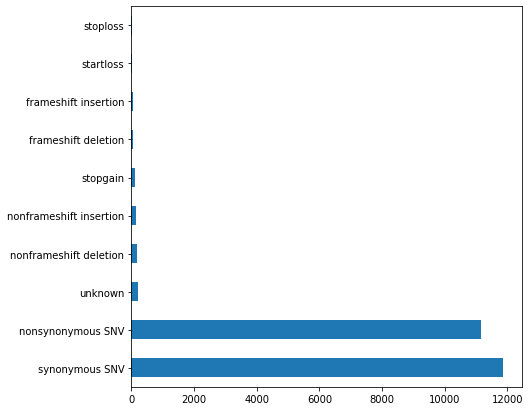

In [5]:
df['ExonicFunc.refGene'].value_counts().plot(kind='barh', figsize=(7,7))

In [6]:
Columns = ['1000G_ALL', '1000G_AMR', 'ExAC_Freq', 'gnomAD_exome_ALL']
filter = df[(df['1000G_ALL'] != '.') & (df['1000G_AMR'] != '.') & (df['gnomAD_exome_ALL'] != '.') 
            & (df['ExAC_Freq'] != '.') & (df['ExonicFunc.refGene'] == 'nonsynonymous SNV')].dropna(subset=Columns)

Filtering Criteria 1: Consider alleles with frequencies of LEQ 0.05 in total and indivdial population (AMR super code). Assumption that higher frequency allele variants will have lower prior probability of having crippling effect on protein function. (Upper bound for allele frequency of disease causing variant)

Filter Criteria 2: Consider Variants labeled as 'D' (Damaging) by SIFT_pred, Polyphen2_HDIV_pred, and Polyphen2_HVAR_pred.


In [7]:
filter[Columns] = filter[Columns].astype('float')
filter1 = filter[(filter['gnomAD_exome_ALL'] <= 0.001) & (filter['ExAC_Freq'] <= 0.001) 
                    & (filter['SIFT_pred'] == 'D') & (filter['Polyphen2_HDIV_pred'] == 'D')
                     & (filter['Polyphen2_HVAR_pred'] == 'D')]
filter1.loc[:,['Chr', 'Start', 'Ref', 'Alt', 'Gene.refGene', 'AAChange.refGene', 
               'CADD_raw', 'SIFT_score', 'dbSNP', 'ClinVar_ID', 'GERP++_RS', 'Otherinfo.12']]

,Chr,Start,Ref,Alt,Gene.refGene,AAChange.refGene,CADD_raw,SIFT_score,dbSNP,ClinVar_ID,GERP++_RS,Otherinfo.12
69,chr1,1704653,C,A,CDK11A,"CDK11A:NM_001313896:exon14:c.G1470T:p.E490D,CD...",3.232,0.014,rs564492756,.,-1.09,"0/1:255,0,196"
688,chr1,31792365,G,A,SPOCD1,"SPOCD1:NM_001281988:exon14:c.C1291T:p.R431W,SP...",6.804,0.002,rs181597046,.,5.56,"0/1:255,0,255"
711,chr1,34761348,C,T,GJB4,GJB4:NM_153212:exon2:c.C94T:p.R32C,5.575,0.014,rs192813377,.,3.61,"0/1:255,0,255"
725,chr1,36180014,C,T,MAP7D1,"MAP7D1:NM_001286365:exon15:c.C2348T:p.A783V,MA...",3.650,0.027,rs191108587,.,5.76,"0/1:100,0,255"
741,chr1,37997804,C,T,FHL3,"FHL3:NM_001243878:exon4:c.G244A:p.G82R,FHL3:NM...",4.849,0.021,rs141005636,.,4.03,"0/1:255,0,255"
980,chr1,65610029,G,A,LEPR,"LEPR:NM_001198687:exon12:c.G1835A:p.R612H,LEPR...",5.048,0.0,rs144159890,.,5.28,"0/1:255,0,255"
1253,chr1,114677466,G,A,AMPD1,"AMPD1:NM_001172626:exon9:c.C1360T:p.R454C,AMPD...",7.967,0.0,rs187527797,.,5.85,"0/1:255,0,255"
1337,chr1,149913354,G,T,SV2A,"SV2A:NM_001328674:exon2:c.C487A:p.R163S,SV2A:N...",6.260,0.005,rs187251378,.,4.88,"0/1:255,0,255"
1471,chr1,152355180,G,A,FLG2,FLG2:NM_001014342:exon3:c.C2606T:p.S869F,2.311,0.042,rs34309186,.,3.46,"0/1:105,0,112"
1874,chr1,186001416,A,T,HMCN1,HMCN1:NM_031935:exon27:c.A4188T:p.K1396N,4.888,0.005,rs182426048,.,0.859,"0/1:255,0,255"
